![Astrofisica Computacional](../../logo.PNG)

---
## 02. Finite Differences Method. Differentiation


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook, the scheme of finite differences to calculate derivatives will be presented.

---

## Discretization of a Smooth Function

Consider a smooth function $f(x)$ on a finite interval $[a,b]$. To represent this function numerically, we must divide the interval by a mesh with $N-1$ equally or equivalently spaced intervals, using $N$ nodes, and evaluate the function there. This process is called *discretizing* the function.

There are various mesh discretization methods (and there are also discretization methods in which continuous functions are represented without a mesh and instead using function bases such as sines or cosines. These are called *spectral methods*).

Some of the mesh-based methods use the so-called *structured meshes*, in which Cartesian coordinates are used (i.e. rectangular meshes) and within them we can name

- Finite differences
- Finite-Volumes
- Finite elements

On the other hand, methods with *unstructured meshes* use other types of coordinates or are based on cells with triangular shapes or tetrahedrons. This type of non-rectangular cells allows domains with irregular shapes to be represented, but handling them is more complex.

### Finite Difference Method

The first method that we will use is the **Finite Differences** in which a rectangular mesh based on Cartesian coordinates will be considered. In this way, the domain will be discretized with a mesh with $N-1$ equally spaced intervals (the distance between any consecutive pair of points is the same) or equivalently by $N$ points (nodes). The discrete data that will represent the function is obtained by evaluating at some specific points. In the following figure you can see two possible choices. In one of them, the function is evaluated at each node while in the other, the function is evaluated at the midpoints of each interval.

<center> <img src="https://i.ibb.co/XZtDysv/Finite-Differences.png" alt="Finite-Differences" border="0">
</center>

---
For example, consider the function $\sin x$ on the interval $[0,2\pi]$. We will create a mesh in this domain and obtain the points to evaluate the function and be able to graph it. It is clear that depending on the size of the mesh, a better or worse graphical representation of the function will be obtained.

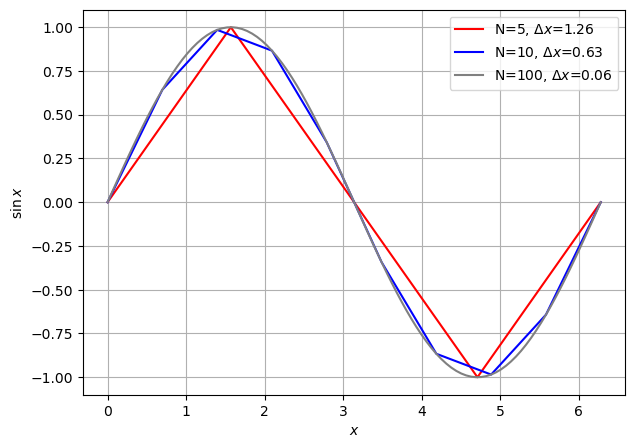

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.sin(x)

# Interval
a = 0.
b = 2*np.pi

# Number of points in the grid
N1 = 5 
N2 = 10
N3 = 100

# Grid size
dx1 = (b-a)/N1 
dx2 = (b-a)/N2 
dx3 = (b-a)/N3 

x_grid1= np.linspace(a, b, N1)
x_grid2= np.linspace(a, b, N2)
x_grid3= np.linspace(a, b, N3)

plt.figure(figsize=(7,5))
plt.plot(x_grid1, f(x_grid1),color='red', label=f'N={N1:.0f}, $\Delta x$={dx1:.2f}')
plt.plot(x_grid2, f(x_grid2),color='blue', label=f'N={N2:.0f}, $\Delta x$={dx2:.2f}')
plt.plot(x_grid3, f(x_grid3),color='grey', label=f'N={N3:.0f}, $\Delta x$={dx3:.2f}')

plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.grid()
plt.legend()
plt.show()

---
## Numerical Derivative of a Finite Difference Analytic Function

Given an analytic function $f(x)$, we can write its Taylor series expansion about a point $x=x_0$ as

$f(x_0 + \Delta x) = \sum_{n=0}^\infty \frac{f^{(n)} (x_0)}{n!} \Delta x ^n = f(x_0) +
 f'(x_0) \Delta x +f''(x_0) \frac{\Delta x^2}{2} + f'''(x_0) \frac{\Delta x^3}{6} + .. .$
 
Truncating the series to second order we have

$f(x_0 + \Delta x) = f(x_0) + f'(x_0) h+ \mathcal{O}(\Delta x^2)$,

where a first-order forward approximation of the first derivative of the function is obtained:

$f'(x_0) = \frac{f(x_0+\Delta x) - f(x_0)}{\Delta x} + \mathcal{O}(\Delta x)$ : (*Forward Difference Derivative*)


Similarly, it is possible to obtain a backward first-order approximation of the first derivative of the function:

$f'(x_0) = \frac{f(x_0) -f(x_0-\Delta x)}{\Delta x} + \mathcal{O}(\Delta x)$ : (*Backward Difference Derivative*)
 

Combining these two relations, a centered second-order approximation of the first derivative of the function is obtained:
 
$f'(x_0) = \frac{f(x_0 + \Delta x) -f(x_0-\Delta x)}{2\Delta x} + \mathcal{O}(\Delta x^2)$ : ( *Central Difference Derivative*)

The following figure represents the three possibilities of numerical derivative:

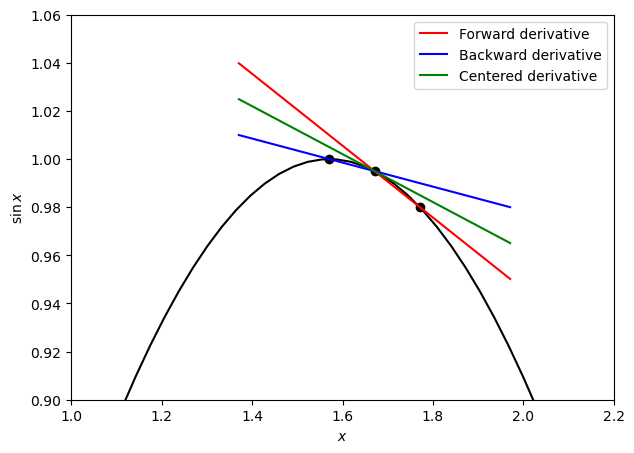

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def forwardDerivative(f, x, dx):
    return (f(x + dx) - f(x))/dx

def backwardDerivative(f, x, dx):
    return (f(x) - f(x - dx))/dx

def centeredDerivative(f, x, dx):
    return (f(x + dx) - f(x - dx))/(2*dx)

# To draw a staright line defined by the numerical derivatives
def straight_line(x_0, y_0, m, x):
    y = y_0 + m*(x - x_0)
    return y

# Point to calculate the derivative
x_0 = np.pi/2 +0.1
y_0 = f(x_0)

# Step size in the derivative
dx = 0.1

# Points involved in the numerical derivatives
points_x = [x_0-dx, x_0, x_0+dx]
points_y = [f(x_0-dx), y_0, f(x_0+dx)]

# Numerical derivatives
f_dfdx = forwardDerivative(f, x_0, dx) 
b_dfdx = backwardDerivative(f, x_0, dx) 
c_dfdx = centeredDerivative(f, x_0, dx)

# x-Ranges to plot function and straight lines
x = np.linspace(0, np.pi, 100)
xline = np.linspace(x_0-0.3, x_0+0.3, 50) 

plt.figure(figsize=(7,5))
plt.plot(x, f(x), 'k')
plt.scatter(points_x, points_y, color='black')
plt.plot(xline, straight_line(x_0, y_0, f_dfdx, xline), 'r', label='Forward derivative')
plt.plot(xline, straight_line(x_0, y_0, b_dfdx, xline), 'b', label='Backward derivative')
plt.plot(xline, straight_line(x_0, y_0, c_dfdx, xline), 'g', label='Centered derivative')

plt.xlim(1.,2.2)
plt.ylim(0.9,1.06)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.legend()
plt.show()


One of the most frequently asked questions is, how do you choose the value of $\Delta x$? Calculus theory does not indicate that we should take $\Delta x \rightarrow 0$. However, due to rounding error and machine precision, taking this limit is not a good idea for numerical calculations.

As an example, consider the function $\sin x$ and its derivative at the point $x=\frac{\pi}{2}$. Next we will calculate the derivative using different values of $h$ and compare the results with the analytic derivative,

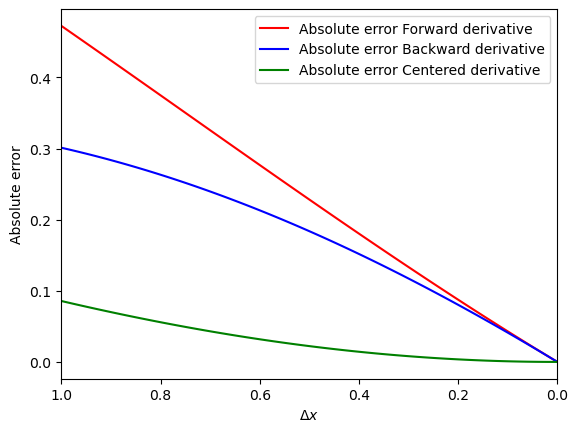

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, dx):
    return (f(x + dx) - f(x))/dx

def backwardDerivative(f, x, dx):
    return (f(x) - f(x - dx))/dx

def centeredDerivative(f, x, dx):
    return (f(x + dx) - f(x - dx))/(2*dx)


x = 1.

dx_max = 1 
dx_min = 1E-12
dx = np.linspace(dx_min, dx_max, 100)

f_dfdx = forwardDerivative(f, x, dx) 
b_dfdx = backwardDerivative(f, x, dx) 
c_dfdx = centeredDerivative(f, x, dx)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure()
plt.plot(dx, abs_error_f, 'r', label='Absolute error Forward derivative')
plt.plot(dx, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.plot(dx, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$\Delta x$')
plt.ylabel(r'Absolute error')
plt.xlim(dx_max, dx_min)
plt.legend()
plt.show()


As can be seen, it seems that a very small value of $\Delta x$ makes all three derivatives give the correct value (the absolute error tends to zero). However, a zoom in the region of very small $\Delta x$ shows interesting behavior,

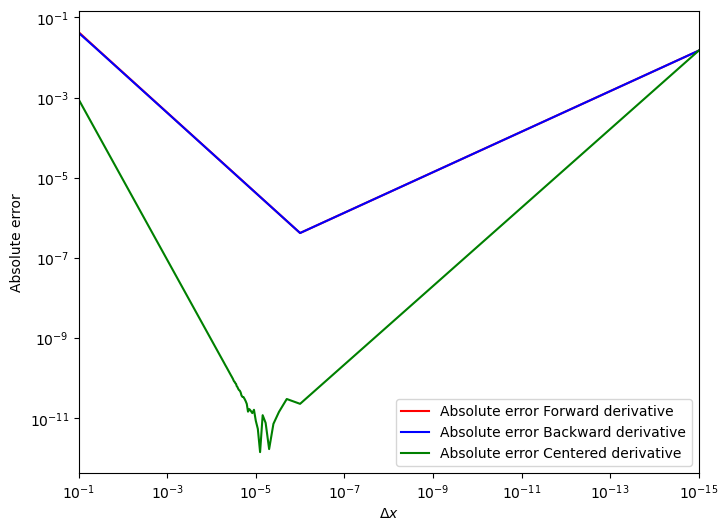

In [4]:
x = 1.

dx_max = 1E-1 
dx_min = 1E-15
dx = np.linspace(dx_min, dx_max, 100000)

f_dfdx = forwardDerivative(f, x, dx) 
b_dfdx = backwardDerivative(f, x, dx) 
c_dfdx = centeredDerivative(f, x, dx)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(8,6))
plt.loglog(dx, abs_error_f, 'r' ,label='Absolute error Forward derivative')
plt.loglog(dx, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.loglog(dx, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$\Delta x$')
plt.ylabel(r'Absolute error')
plt.xlim(dx_max, dx_min)
plt.legend()
plt.show()

The absolute error associated with all three numerical methods has a minimum and then increases again. Another approach allows to better locate the location of the minimum,

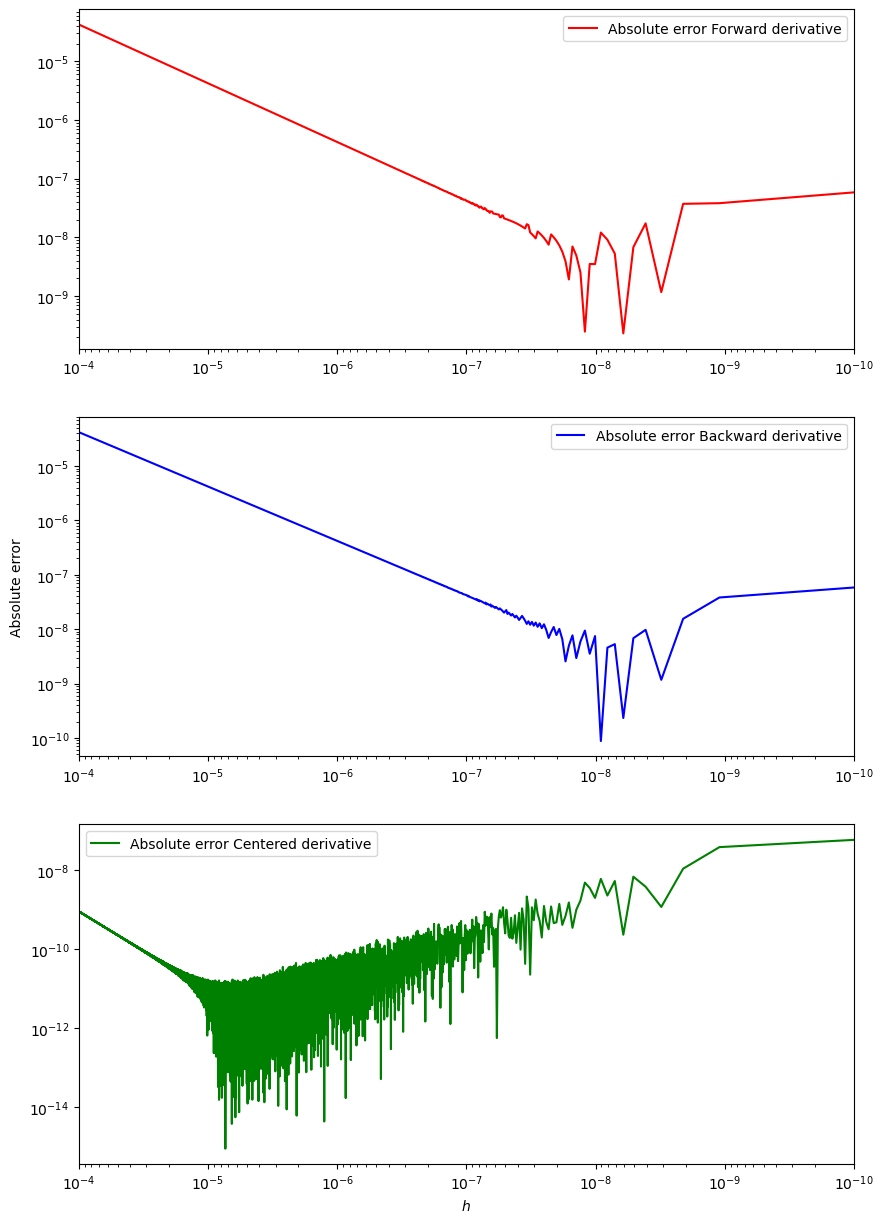

In [5]:
x = 1.

dx_max = 1E-4 
dx_min = 1E-10
dx = np.linspace(dx_min, dx_max, 100000)

f_dfdx = forwardDerivative(f, x, dx) 
b_dfdx = backwardDerivative(f, x, dx) 
c_dfdx = centeredDerivative(f, x, dx)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.loglog(dx, abs_error_f, color='red', label='Absolute error Forward derivative')
plt.xlim(dx_max, dx_min)
plt.legend()

plt.subplot(3,1,2)
plt.loglog(dx, abs_error_b, color='blue',label='Absolute error Backward derivative')
plt.ylabel(r'Absolute error')
plt.xlim(dx_max, dx_min)
plt.legend()

plt.subplot(3,1,3)
plt.loglog(dx, abs_error_c, color='green', label='Absolute error Centered derivative')
plt.xlim(dx_max, dx_min)
plt.legend()

plt.xlabel(r'$h$')
plt.xlim(dx_max, dx_min)
plt.show()

### Selection of the stepsize $\Delta x$

In the previous graphs, a common rule for the selection of the parameter $\Delta x$ is illustrated, in which it is suggested to take the square root of the epsilon of the machine,

$\Delta x \sim \sqrt{\epsilon}$

Since we determined earlier that $\epsilon \sim 10^{-16}$, we will take $\Delta x \sim 10^{-8}$.

##### Example
This example calculates the numerical derivative of the function $\sin x$ over a range of the variable $x$ and compares it to the value of the analytic derivative.

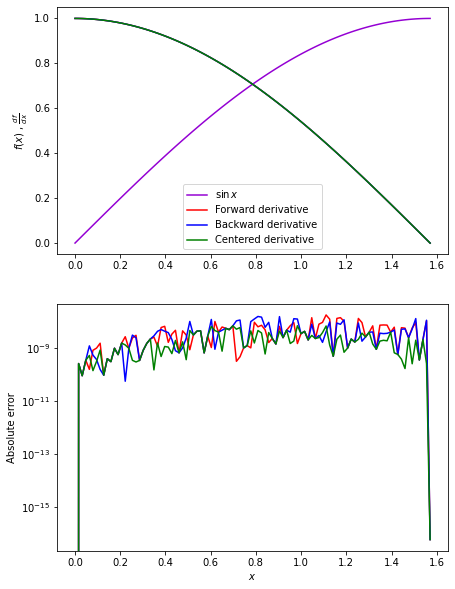

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, dx=1e-8):
    return (f(x + dx) - f(x))/dx

def backwardDerivative(f, x, dx=1e-8):
    return (f(x) - f(x - dx))/dx

def centeredDerivative(f, x, dx=1e-8):
    return (f(x + dx) - f(x - dx))/(2*dx)


x = np.linspace(0, np.pi/2, 100)
function = f(x)
f_dfdx = forwardDerivative(f, x) 
b_dfdx = backwardDerivative(f, x) 
c_dfdx = centeredDerivative(f, x) 

abs_error_f = np.abs(f_dfdx - dfdx(x))
abs_error_b = np.abs(b_dfdx - dfdx(x))
abs_error_c = np.abs(c_dfdx - dfdx(x))

plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
plt.plot(x, function, color='darkviolet', label=r'$\sin x$')
plt.plot(x, f_dfdx, 'r', label=r'Forward derivative')
plt.plot(x, b_dfdx, 'b', label=r'Backward derivative')
plt.plot(x, c_dfdx, 'g', label=r'Centered derivative')
plt.ylabel(r'$f(x)$ , $\frac{df}{dx}$' )
plt.legend()

plt.subplot(2,1,2)
plt.plot(x, abs_error_f, 'r', label=r'Forward derivative')
plt.plot(x, abs_error_b, 'b', label=r'Backward derivative')
plt.plot(x, abs_error_c, 'g', label=r'Centered derivative')
plt.yscale('log')
plt.ylabel(r'Absolute error')

plt.xlabel(r'$x$')
plt.show()


###### Note that the absolute error in the numerical derivative is never greater than $10^{-8}$

---
## Differentiation on an interval.

Consider an equally spaced mesh defining a domain $[x_0, x_1, ..., x_j, ...,x_{n-1}] $. At any of the internal points of this interval, the first derivative of a function can be calculated using the forward or backward finite differences,

$f'(x_i) = \frac{f_{i+1} - f_{i}}{\Delta x} + \mathcal{O}(\Delta x) $

$f'(x_i) = \frac{f_i - f_{i-1}}{\Delta x} + \mathcal{O}(\Delta x) $

and also with the centered second-order approximation,

$f'(x_i) = \frac{f_{i+1} - f_{i-1}}{2\Delta x} + \mathcal{O}(\Delta x^2) .$

However, it should be noted that at the point $x_{n-1}$ it is not possible to use the forward derivative while at the point $x_0$ it is not possible to use the backward derivative. Similarly, the centered derivative cannot be used at either of these two domain boundary points.

---
## Finite Differences in a Mesh with Unequal Intervals

In some applications in astrophysics it is appropriate to use a mesh with unequal intervals to more accurately describe the system.

In this case, the one-sided derivatives (forward or backward) are not modified because they only include an interval (two consecutive points) and therefore a single value of $\Delta x$.

On the other hand, the centered derivative involves three points, that is, two intervals and therefore two values ​​of $h$. To obtain an expression for this second-order derivative, consider the following series expansions of the function,

$f(x_i + \Delta x_2) = f(x_i) + f'(x_i) \Delta x_2 + f''(x_i) \frac{\Delta x_2^2}{2} +
\mathcal{OR}(\Delta x_2^3)$

$f(x_i - \Delta x_1) = f(x_i) - f'(x_i)\Delta x_1 + f''(x_i) \frac{\Delta x_1^2}{2} +
\mathcal{O}(\Delta x_1^3)$,

where $\Delta x_1 = x_i - x_{i-1}$ and $\Delta x_2 = x_{i+1} - x_{i}$. Subtracting these equations and eliminating the second derivative term, the value of $f'(x_i)$ can be solved in the form

$f'(x_i) = \frac{\Delta x_1}{\Delta x_2(\Delta x_1+\Delta x_2)} f(x_{i+1}) - \frac{\Delta x_1 - \Delta x_2}{\ \Delta x_2 \Delta x_1} f(x_i)
- \frac{\Delta x_2}{\Delta x_1(\Delta x_1 + \Delta x_2)} f(x_{i-1})$.

It is clear that this expression reduces to the derivative centered on an equally spaced mesh when $\Delta x_1 = \Delta x_2 = \Delta x$.

---
## Numerical Differentiation of a Discrete Function

We will now implement an algorithm to calculate the numerical derivative of a function given by a set of discrete points in a .txt file.

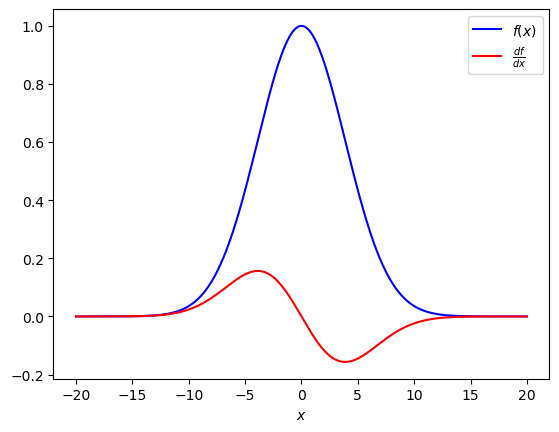

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def Derivative(x, f):
    '''
    ------------------------------------------
    This function returns the numerical 
    derivative of a discretely-sample function 
    using one-side derivatives in the extreme 
    points of the interval and second order 
    accurate derivative in the middle points.
    The data points may be evenly or unevenly
    spaced.
    ------------------------------------------
    '''
    # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
    
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

# Loading the data
data = np.loadtxt('function_data.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

# Calling the derivative function
dfdx_data = Derivative(x,f)

plt.plot(x, f, 'b', label=r'$f(x)$')
plt.plot(dfdx_data[:,0], dfdx_data[:,1], 'r', label=r'$\frac{df}{dx}$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()


---
## Numerical Method Convergence

### 1. When the analytical solution is known

If an astrophysical problem has an analytical solution $Y(x)$ and a certain algorithm results in a numerical solution $y(x;\Delta x)$, the numerical method is said to be **convergent** if

\begin{equation}
\lim_{\Delta x \rightarrow 0} y(x;\Delta x) = Y(x).
\end{equation}

To measure the convergence of the numerical method, the **convergence factor**, $C$, will be entered as

$$
C = \frac{\left| y(x:\Delta x_2) - Y(x) \right|}{\left| y(x:\Delta x_1) - Y(x) \right|} \equiv \left(\frac{\Delta x_2}{\Delta x_1} \right)^n
$$

where two discretization sizes $\Delta x_2 < \Delta x_1$ have been chosen. When $C<1$, the numerical method is convergent and, due to the last identification, the number $n$ corresponds to the precision order of the method.

For example, if we take the discretization values ​​such that $\frac{\Delta x_2}{\Delta x_1} = 10^{-1}$, we obtain

$$
C \equiv \left(\frac{\Delta x_2}{\Delta x_1} \right)^n = (10^{-1})^n = 10^{-n}
$$

and therefore the precision order of the method will be $n=-\log_{10} C$.

##### Example

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, dx=1e-8):
    return (f(x + dx) - f(x))/dx

def centeredDerivative(f, x, dx=1e-8):
    return (f(x + dx) - f(x - dx))/(2*dx)

x_0 = 1.
dx1 = 1E-3
dx2 = 1E-4

# Forward Derivative Convergence Test
y_1 = forwardDerivative(f, x_0, dx1)
y_2 = forwardDerivative(f, x_0, dx2)

C_forward = np.abs(y_2 - dfdx(x_0))/np.abs(y_1 - dfdx(x_0))

print('Forward derivative:')
print(f'For dx_1 = {dx1:.1e} and dx_2 = {dx2:.1e}' )
print(f'the convergence factor is C = {C_forward:.2f}')
print(f'which corresponds to n = {-np.log10(C_forward):.1f}')


# Centered Derivative Convergence Test
y_1 = centeredDerivative(f, x_0, dx1)
y_2 = centeredDerivative(f, x_0, dx2)

C_centered = np.abs(y_2 - dfdx(x_0))/np.abs(y_1 - dfdx(x_0))

print('')
print('Central derivative:')
print(f'For dx_1 = {dx1:.1e} and dx_2 = {dx2:.1e}' )
print(f'the convergence factor is C = {C_centered:.2f}')
print(f'which corresponds to n = {-np.log10(C_centered):.1f}')

Forward derivative:
For dx_1 = 1.0e-03 and dx_2 = 1.0e-04
the convergence factor is C = 0.10
which corresponds to n = 1.0

Central derivative:
For dx_1 = 1.0e-03 and dx_2 = 1.0e-04
the convergence factor is C = 0.01
which corresponds to n = 2.0


#### 2. When the analytical solution is NOT known.

In many cases the analytical solution $Y(x)$ is NOT known. So, how can the convergence test of the numerical method be performed?

In this case three discretization sizes $\Delta x_3 < \Delta x_2 < \Delta x_1$ will be introduced, and the **self-convergence factor**, $C_{self}$, is defined,

$C_{self} = \frac{\left| y(x:\Delta x_3) - y(x:\Delta x_2) \right|}{\left| y(x:\Delta x_2) - y(x:\Delta x_1) \right|} \equiv \frac{\Delta x_3^n - \Delta x_2^n}{\Delta x_2^n - \Delta x_1^n }. $

For example, if you take values such that $\frac{\Delta x_3}{\Delta x_2} = \frac{\Delta x_2}{\Delta x_1} = 10^{-1}$ , you will get

$C_{self} \equiv \frac{10^{-n} \Delta x_2^n - \Delta x_2^n}{10^{-n}\Delta x_1^n - \Delta x_1^n} = \frac {(10^{-n}-1) \Delta x_2^n }{(10^{-n}-1)\Delta x_1^n } = \left( \frac{\Delta x_2}{\Delta x_1} \right)^n = (10^{-1})^n = 10^{-n}$

and therefore the order of precision is $n=-\log_{10} C$.

##### Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def forwardDerivative(f, x, dx=1e-8):
    return (f(x + dx) - f(x))/dx

def centeredDerivative(f, x, dx=1e-8):
    return (f(x + dx) - f(x - dx))/(2*dx)

x_0 = 1.
dx1 = 1E-2
dx2 = 1E-3
dx3 = 1E-4

# Forward Derivative Convergence Test
y_1 = forwardDerivative(f, x_0, dx1)
y_2 = forwardDerivative(f, x_0, dx2)
y_3 = forwardDerivative(f, x_0, dx3)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)

print('Forward derivative:')
print(f'For dx_1 = {dx1:.1e}, dx_2 = {dx2:.1e} and dx_3 = {dx3:.1e}' )
print(f'the self-convergence factor is C = {C_self:.2f}')
print(f'which corresponds to n = {-np.log10(C_self):.1f}')


# Centered Derivative Convergence Test
y_1 = centeredDerivative(f, x_0, dx1)
y_2 = centeredDerivative(f, x_0, dx2)
y_3 = centeredDerivative(f, x_0, dx3)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)

print('')
print('Central derivative:')
print(f'For dx_1 = {dx1:.1e}, dx_2 = {dx2:.1e} and dx_3 = {dx3:.1e}' )
print(f'the self-convergence factor is C = {C_self:.2f}')
print(f'which corresponds to n = {-np.log10(C_self):.1f}')